# Assignment 2

Lorenzo Biasi and Michael Aichmüller

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

init_printing() 

### Exercise 1

We proceed building the alogrithm for testing the accuracy of the numerical derivative

In [2]:
def f(x):
    return np.exp(np.sin(x))

def df(x):
    return f(x) * np.cos(x)

def absolute_err(f, df, h):
    g = (f(h) - f(0)) / h
    return np.abs(df(0) - g)

hs = 10. ** -np.arange(15)
epsilons = np.empty(15)
for i, h in enumerate(hs):
    epsilons[i] = absolute_err(f, df, h) 

### a)

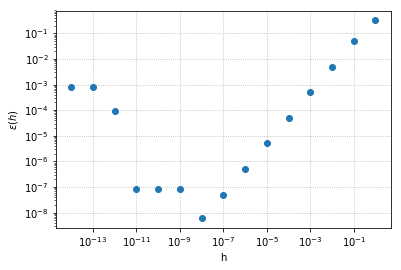

In [3]:
plt.plot(hs, epsilons, 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'h')
plt.ylabel(r'$\epsilon(h)$')
plt.grid(linestyle='dotted')

We can see that until $h = 10^7$ the trend is that the absolute error diminishes, but after that it goes back up. This is due to the fact that when we compute $f(h) - f(0)$ we are using an ill-conditioned operation. In fact these two values are really close to each other.

### Exercise 2
##### a. 
We can easily see that when $\|x\| \ll 1$ we have that both $\frac{1 - x }{x + 1}$ and $\frac{1}{2 x + 1}$ are almost equal to 1, so the subtraction is ill-conditined.

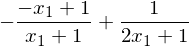

In [4]:
x_1 = symbols('x_1')
fun1 = 1 / (1 + 2*x_1) - (1 - x_1) / (1 + x_1)
fun1

We can modify the previous expression for being well conditioned around 0. This is well conditoned.

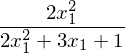

In [5]:
fun2 = simplify(fun1)
fun2

A comparison between the two ways of computing this value. we can clearly see that if we are far from 1 the methods are nearly identical, but the closer you get to 0 the two methods diverge

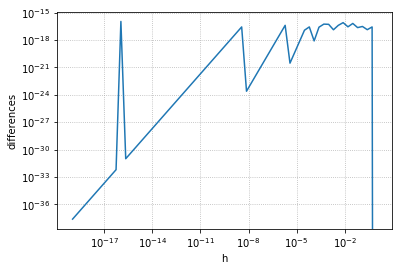

In [6]:
def f1(x):
    return 1 / (1 + 2*x) - (1 - x) / (1 + x)

def f2(x):
    return 2*x**2/((1 + 2*x)*(1 + x))

hs = 2. ** - np.arange(64)
plt.plot(hs, np.abs(f1(hs) - f2(hs)))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'h')
plt.ylabel('differences')
plt.grid(linestyle='dotted')

### b.
As before we have the subtraction of two really close values, so it is going to be ill conditioned for $x$ really big.

$ \sqrt{x +  \frac{1}{x}} - \sqrt{x -  \frac{1}{x}} = \sqrt{x +  \frac{1}{x}} - \sqrt{x -  \frac{1}{x}} \frac{\sqrt{x +  \frac{1}{x}} + \sqrt{x -  \frac{1}{x}} }{\sqrt{x +  \frac{1}{x}} + \sqrt{x -  \frac{1}{x}}} = \frac{2}{x(\sqrt{x +  \frac{1}{x}} + \sqrt{x -  \frac{1}{x}})}$

/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/lorenzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


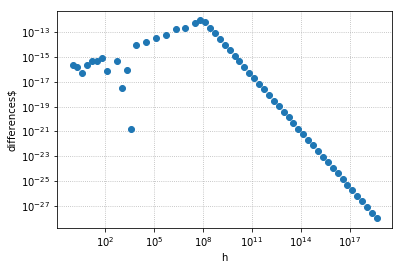

In [7]:
def f3(x):
    return np.sqrt(x + 1/x) - np.sqrt(x - 1 / x)

def f4(x):
    return 2 / (np.sqrt(x + 1/x) + np.sqrt(x - 1 / x)) / x

hs = 2 ** np.arange(64)

plt.plot(hs, np.abs(f3(hs) - f4(hs)), 'o')
#plt.plot(hs, , 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'h')
plt.ylabel('differences$')
plt.grid(linestyle='dotted')

## Exercise 3.

### a. 
If we assume we posess a 6 faced dice, we have at each throw three possible outcome. So we have to take all the combination of 6 numbers repeating 3 times. It is intuitive that our $\Omega$ will be composed by $6^3 = 216$ samples, and will be of type:
$(1, 1, 1), (1, 1, 2), (1, 1, 3), ... (6, 6, 5), (6, 6, 6)$

In [8]:
import itertools
x = [1, 2, 3, 4, 5, 6]
omega = set([p for p in itertools.product(x, repeat=3)])
print(r'Omega has', len(omega), 'elements and they are:')
print(omega)

Omega has 216 elements and they are:
{(4, 2, 2), (1, 4, 4), (2, 2, 4), (5, 5, 1), (5, 2, 1), (1, 4, 2), (5, 5, 3), (3, 1, 6), (5, 2, 3), (5, 5, 5), (3, 1, 4), (2, 6, 5), (3, 2, 2), (4, 1, 5), (3, 1, 2), (2, 6, 3), (6, 5, 5), (2, 5, 3), (4, 4, 2), (1, 2, 2), (6, 6, 3), (2, 6, 1), (6, 5, 3), (3, 2, 6), (2, 5, 1), (4, 6, 1), (4, 1, 1), (1, 2, 4), (6, 6, 1), (5, 3, 2), (1, 5, 5), (6, 5, 1), (3, 2, 4), (4, 6, 3), (4, 1, 3), (1, 2, 6), (2, 5, 5), (4, 6, 5), (1, 3, 5), (6, 3, 1), (4, 3, 6), (6, 6, 5), (5, 3, 6), (1, 5, 1), (3, 4, 5), (2, 3, 4), (1, 3, 3), (6, 3, 3), (4, 3, 4), (5, 6, 2), (5, 3, 4), (1, 5, 3), (2, 3, 6), (1, 3, 1), (6, 3, 5), (4, 3, 2), (5, 6, 4), (6, 4, 4), (3, 3, 1), (5, 1, 5), (3, 4, 1), (6, 2, 6), (5, 6, 6), (6, 4, 6), (3, 3, 3), (3, 4, 3), (2, 3, 2), (6, 2, 4), (6, 1, 2), (3, 3, 5), (2, 4, 2), (5, 1, 1), (3, 6, 6), (6, 2, 2), (5, 4, 3), (1, 6, 4), (6, 4, 2), (5, 1, 3), (2, 4, 4), (3, 6, 4), (4, 5, 2), (6, 1, 6), (5, 4, 1), (1, 6, 6), (2, 4, 6), (3, 6, 2), (2, 1, 5), (4, 5

Concerning the $\sigma$-algebra we need to state that there does not exist only a $\sigma$-algebra for a given $\Omega$, but it this case a reasonable choice would be the powerset of $\Omega$.

### b.
In case of fairness of dice we will have the discrete uniform distribution. And for computing the value of $\rho(\omega)$ we just need to compute the inverse of our sample space $\rho(\omega) = \frac{1}{6^3}$

In [9]:
1/(6**3)

### c.
If we want to determine the set $A$ we can take in consideration its complementary $A^c = \{\text{Not even one throw is 6}\}$. This event is analogous the sample space of a 5-faced dice. So it's dimension will be $5^3$. For computing the size of $A$ we can simply compute $6^3 - 5^3$ and for the event its self we just need to $\Omega \setminus A^c = A$

In [10]:
print('Size of A^c:', 5**3)
print('Size of A:   ', 6 ** 3 - 5 ** 3)

Size of A^c: 125
Size of A:    91


In [11]:
36 + 5 * 6 + 5 * 5

In [12]:
x = [1, 2, 3, 4, 5]
A_c =  set([p for p in itertools.product(x, repeat=3)])
print('A^c has ', len(A_c), 'elements.\nA^c =', A_c)
print('A has ', len(omega - A_c), 'elements.\nA^c =', omega - A_c)

A^c has  125 elements.
A^c = {(4, 2, 2), (1, 4, 4), (2, 2, 4), (5, 5, 1), (5, 2, 1), (1, 4, 2), (5, 5, 3), (5, 2, 3), (5, 5, 5), (3, 1, 4), (3, 2, 2), (4, 1, 5), (3, 1, 2), (2, 5, 3), (1, 2, 2), (2, 5, 1), (4, 1, 1), (1, 2, 4), (5, 3, 2), (1, 5, 5), (3, 2, 4), (4, 1, 3), (2, 5, 5), (1, 3, 5), (1, 5, 1), (3, 4, 5), (2, 3, 4), (1, 3, 3), (4, 3, 4), (5, 3, 4), (1, 5, 3), (1, 3, 1), (4, 3, 2), (3, 3, 1), (5, 1, 5), (3, 4, 1), (3, 3, 3), (3, 4, 3), (2, 3, 2), (3, 3, 5), (2, 4, 2), (5, 1, 1), (5, 4, 3), (5, 1, 3), (2, 4, 4), (4, 5, 2), (5, 4, 1), (4, 5, 4), (2, 1, 5), (4, 2, 5), (3, 5, 2), (2, 2, 3), (2, 1, 3), (5, 4, 5), (2, 2, 1), (4, 4, 5), (2, 1, 1), (4, 2, 1), (1, 1, 2), (5, 2, 4), (4, 4, 3), (4, 2, 3), (1, 1, 4), (3, 5, 4), (2, 2, 5), (4, 4, 1), (1, 4, 5), (5, 2, 2), (1, 4, 3), (5, 5, 2), (3, 1, 5), (1, 4, 1), (4, 1, 4), (5, 5, 4), (3, 1, 3), (3, 2, 3), (2, 5, 2), (1, 2, 1), (3, 1, 1), (3, 2, 1), (1, 2, 3), (5, 3, 3), (4, 1, 2), (1, 2, 5), (5, 3, 1), (1, 5, 4), (3, 2, 5), (2, 5, 4), (3

P(A) will be $\frac{91}{216}$

In [13]:
91 / 216